In [206]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/realestatepriceprediction/sample_submission.csv
/kaggle/input/realestatepriceprediction/train.csv
/kaggle/input/realestatepriceprediction/test.csv


# Загрузка данных 

In [207]:
# формат для submission
submission = pd.read_csv('/kaggle/input/realestatepriceprediction/sample_submission.csv')
submission.head()

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0


In [209]:
# Read the train data
data = pd.read_csv('/kaggle/input/realestatepriceprediction/train.csv')#, index_col='Id')
data.describe()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [210]:
# read test data

data_test = pd.read_csv('/kaggle/input/realestatepriceprediction/test.csv')#, index_col='Id')

# Подготовка данных

In [211]:
features_names_all = ['DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Ecology_2','Ecology_3','Social_1','Social_2','Social_3','Healthcare_1', 'Helthcare_2', 'Shops_1','Shops_2']

# Обработка пропусков

In [212]:


median_lsquare = data['LifeSquare'].median()
data['LifeSquare'] = data['LifeSquare'].fillna(median_lsquare)

median_healthcare_1 = data['Healthcare_1'].median()
data['Healthcare_1'] = data['Healthcare_1'].fillna(median_healthcare_1)

median_lsquare = data_test['LifeSquare'].median()
data_test['LifeSquare'] = data_test['LifeSquare'].fillna(median_lsquare)

median_healthcare_1 = data_test['Healthcare_1'].median()
data_test['Healthcare_1'] = data_test['Healthcare_1'].fillna(median_healthcare_1)

# Обработка выбросов

In [213]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

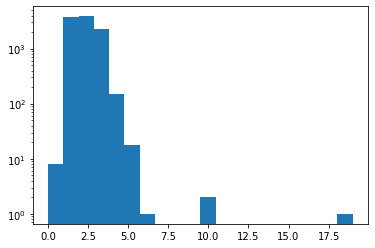

In [214]:
plt.hist(data['Rooms'],bins=20)
plt.yscale(value="log")
plt.show()

In [215]:


# Количество комнат равно 0 заменим на 1, если больше 5 то замена на 5
data.loc[(data['Rooms'] == 0), 'Rooms'] = 1
data.loc[(data['Rooms'] > 5), 'Rooms'] = 5

data_test.loc[(data_test['Rooms'] == 0), 'Rooms'] =1
data_test.loc[(data_test['Rooms'] > 5), 'Rooms'] = 5 
   

In [216]:
data['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
39.0        2
48.0        2
99.0        2
29.0        1
44.0        1
47.0        1
36.0        1
31.0        1
38.0        1
117.0       1
45.0        1
26.0        1
Name: HouseFloor, dtype: int64

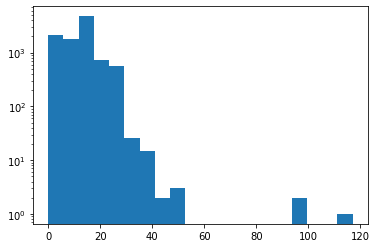

In [217]:
plt.hist(data['HouseFloor'],bins=20)
plt.yscale(value="log")
plt.show()

In [218]:
# HouseFloor равное 0 заменим на 1, этажи больше 50 заменим на 50

data.loc[(data['HouseFloor'] == 0), 'HouseFloor'] = 1
data.loc[data['HouseFloor'] > 50] = 50

data_test.loc[(data_test['HouseFloor'] == 0), 'HouseFloor'] = 1
data_test.loc[(data_test['HouseFloor'] > 50), 'HouseFloor'] = 50


In [219]:
data['Square'].value_counts()

50.000000    3
51.576501    1
40.885068    1
28.643684    1
60.160707    1
            ..
67.133598    1
30.946421    1
86.043476    1
40.570752    1
65.181099    1
Name: Square, Length: 9998, dtype: int64

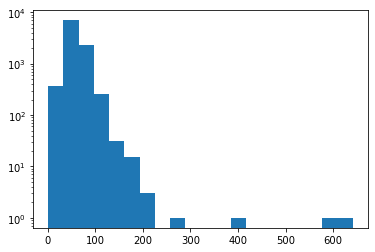

In [220]:
plt.hist(data['Square'],bins=20)
plt.yscale(value="log")
plt.show()

In [221]:
# площадь

data.loc[(data['Square'] < 15), 'Square'] = 15
data.loc[(data['Square'] > 300), 'Square'] = 300

data_test.loc[(data_test['Square'] < 15), 'Square'] = 15
data_test.loc[(data_test['Square'] > 300), 'Square'] = 300

        

In [222]:
data['LifeSquare'].value_counts()

32.781260    2114
50.000000       3
48.650696       1
76.956670       1
30.749207       1
             ... 
33.587789       1
47.221007       1
19.829865       1
48.028007       1
3.943299        1
Name: LifeSquare, Length: 7885, dtype: int64

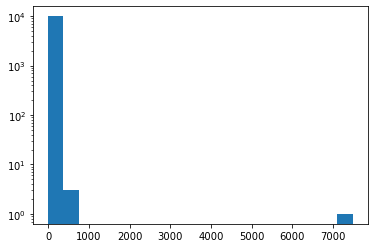

In [223]:
plt.hist(data['LifeSquare'],bins=20)
plt.yscale(value="log")
plt.show()

In [224]:
# жилая площадь

data.loc[(data['LifeSquare'] < 10), 'LifeSquare'] = 10
data.loc[(data['LifeSquare'] > 280), 'LifeSquare'] = 280

data_test.loc[(data_test['LifeSquare'] < 10), 'LifeSquare'] = 10
data_test.loc[(data_test['LifeSquare'] > 280), 'LifeSquare'] = 280
       

In [225]:
data['KitchenSquare'].value_counts()

1.0       2458
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        842
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
50.0         3
22.0         3
112.0        2
58.0         2
30.0         2
41.0         2
32.0         2
51.0         2
37.0         2
43.0         2
25.0         2
27.0         1
31.0         1
66.0         1
48.0         1
42.0         1
72.0         1
2014.0       1
96.0         1
54.0         1
21.0         1
123.0        1
29.0         1
53.0         1
84.0         1
78.0         1
40.0         1
26.0         1
63.0         1
36.0         1
1970.0       1
35.0         1
73.0         1
60.0         1
39.0         1
23.0         1
62.0         1
75.0         1
Name: KitchenSquare, dtype: int64

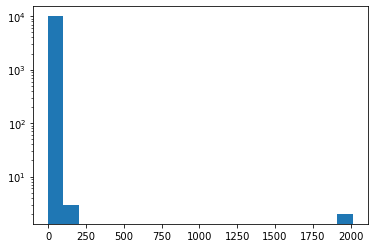

In [226]:
plt.hist(data['KitchenSquare'],bins=20)
plt.yscale(value="log")
plt.show() 

In [227]:
# площадь кухни от 3м.кв до 30 м.кв
data.loc[(data['KitchenSquare'] < 3), 'KitchenSquare'] = 3
data.loc[(data['KitchenSquare'] > 30), 'KitchenSquare'] = 30 

data_test.loc[(data_test['KitchenSquare'] < 3), 'KitchenSquare'] = 3
data_test.loc[(data_test['KitchenSquare'] > 30), 'KitchenSquare'] = 30 

        

In [228]:
data['Floor'].value_counts()

4     949
5     875
3     872
6     801
7     759
8     642
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
50      3
28      3
32      2
42      1
37      1
33      1
31      1
Name: Floor, dtype: int64

In [229]:
# если этаж больше этажности дома, то присваиваем случайный этаж от минимального до максимального этажа в доме
HouseFloor_min =1
floor_outliers = data.loc[data['Floor'] > data['HouseFloor']].index
data.loc[floor_outliers, 'Floor'] = data.loc[floor_outliers, 'HouseFloor'].apply(lambda x: HouseFloor_min if (HouseFloor_min == x) else np.random.randint(HouseFloor_min, x))

HouseFloor_min =1
floor_outliers = data_test.loc[data_test['Floor'] > data_test['HouseFloor']].index
data_test.loc[floor_outliers, 'Floor'] = data_test.loc[floor_outliers, 'HouseFloor'].apply(lambda x: HouseFloor_min if (HouseFloor_min == x) else np.random.randint(HouseFloor_min, x))

In [230]:
data['HouseYear'].value_counts()

1977        2649
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 98, dtype: int64

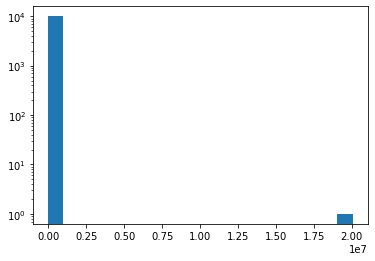

In [231]:
plt.hist(data['HouseYear'],bins=20)
plt.yscale(value="log")
plt.show() 

In [232]:
# год постройки дома

current_year = datetime.datetime.now().year
data.loc[(data['HouseYear'] > current_year), 'HouseYear'] = current_year

data_test.loc[(data_test['HouseYear'] > current_year), 'HouseYear'] = current_year

        

# Добавление новых фичей

In [233]:
# подсчет средней цены за м2 по району
data_temp = data.copy()
data_temp["SquareMeterPrice"] = data_temp["Price"] / data_temp["Square"]
SquareMeterPrice_by_DistrictId = data_temp.groupby('DistrictId', as_index=False)\
            .agg({'SquareMeterPrice': 'mean'})\
            .rename(columns={'SquareMeterPrice': 'AvrMeterPrice'})

# добавление признака средней стоимости м2 по району
data = data.merge(SquareMeterPrice_by_DistrictId, on=["DistrictId"], how='left')
data['AvrMeterPrice'].fillna(data['AvrMeterPrice'].median(), inplace=True)

In [171]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,AvrMeterPrice
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,B,33,7976,5,900.0,0,11,B,184966.930730,4384.628620
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,4293.480295
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,4835.401165
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,3021.675025
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,3938.329635


In [234]:
# Для тестовых данных
# добавление признака средней стоимости м2 по району
data_test = data_test.merge(SquareMeterPrice_by_DistrictId, on=["DistrictId"], how='left')
data_test['AvrMeterPrice'].fillna(data_test['AvrMeterPrice'].median(), inplace=True)

In [173]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,AvrMeterPrice
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,8381.40430,50.404900,1.903300,56.249989,35.608468,6.494100,7.209300,12.61980,1984.29450,0.133835,24.697600,5351.045600,8.039400,1025.915000,1.33380,4.243300,214064.201859,3905.536830
std,4860.38352,43.584111,1.164682,19.576280,16.540990,3.427702,5.166794,6.56498,38.23683,0.872040,17.536861,4007.601201,23.805762,746.678096,1.71478,4.867594,92942.168779,948.658558
min,0.00000,0.000000,1.000000,15.000000,10.000000,3.000000,1.000000,1.00000,50.00000,0.000000,0.000000,50.000000,0.000000,0.000000,0.00000,0.000000,50.000000,2284.108677
25%,4166.75000,20.000000,1.000000,41.774881,25.527399,3.000000,3.000000,9.00000,1974.00000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.00000,1.000000,153830.011790,3021.675025
50%,8392.50000,36.000000,2.000000,52.502558,32.781260,6.000000,6.000000,13.00000,1977.00000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,192180.997752,4084.464328
75%,12592.50000,75.000000,2.000000,65.894295,41.427234,9.000000,10.000000,17.00000,2001.00000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.00000,6.000000,249116.513046,4537.486720
max,16798.00000,209.000000,50.000000,300.000000,280.000000,30.000000,50.000000,50.00000,2021.00000,50.000000,74.000000,19083.000000,141.000000,4849.000000,50.00000,50.000000,633233.466570,9452.113505


In [235]:
target = ['Price']

In [236]:
# иключим из features categorical data
features_names = ['DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1','Social_2','Social_3','Healthcare_1', 'Helthcare_2', 'Shops_1']

In [237]:
#features_name_impotant = ['DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Social_1','Social_2','Social_3', 'Helthcare_2', 'Shops_1']

In [238]:
# Обработка categorical data
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
AvrMeterPrice    float64
dtype: object

In [191]:
# Обработка категорий(Convert categorical variable into dummy/indicator variables.)

#data = pd.concat([data, pd.get_dummies(data['Ecology_2'], prefix='Ecology_2', dtype='int8')], axis=1)
#data = pd.concat([data, pd.get_dummies(data['Ecology_3'], prefix='Ecology_3', dtype='int8')], axis=1)
#data = pd.concat([data, pd.get_dummies(data['Shops_2'], prefix='Shops_2', dtype='int8')], axis=1)

In [192]:
#features_names_cat = ['DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1','Social_2','Social_3','Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A','Ecology_2_B','Ecology_3_A','Ecology_3_B','Shops_2_A','Shops_2_B']

In [193]:
#data[features_names_cat].dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Ecology_2_A         int8
Ecology_2_B         int8
Ecology_3_A         int8
Ecology_3_B         int8
Shops_2_A           int8
Shops_2_B           int8
dtype: object

In [250]:
# Создаем датафреймы из данных
X=pd.DataFrame(data, columns=features_names)
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,900.0,0,11
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16
2,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4


In [251]:
X_test=pd.DataFrame(data_test, columns=features_names)
X_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,900.0,0,0
1,74,2.0,69.263183,32.925087,3.0,1,1.0,1977,0.075779,6,1437,3,900.0,0,2
2,190,1.0,15.000000,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,900.0,3,3
4,27,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,2,629,1,900.0,0,0


In [252]:
y = pd.DataFrame(data, columns=target)
y.head()

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


#  Разделим данные на тренировочные и валидационные наборы

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state = 42)

In [254]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(
    silent=True,
    learning_rate=0.1,
    iterations=1150,
    eval_metric='R2',
    depth=8
)

In [255]:
cbr.fit(X_train, y_train)

In [256]:
y_pred = cbr.predict(X_valid)

In [257]:
check_test = pd.DataFrame({
    "y_valid": y_valid["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head()

,y_valid,y_pred
6252,181530.459031,183429.960887
4684,260456.004692,277473.962706
1731,219945.304640,215171.373142
4742,66883.280318,67070.645141
4521,114086.065201,126952.910956


In [259]:
# Вычислим R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics. Best score: 0.7715060224811309 
# Last 0.734812713204521
from sklearn.metrics import r2_score

r2_score(check_test["y_valid"], check_test["y_pred"])


0.734812713204521

In [203]:
# Generate test predictions
preds_test = cbr.predict(X_test)

In [204]:
 # Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': data_test['Id'],
                       'Price': preds_test.flatten()})
output.to_csv('submission.csv', index=False)

In [205]:
output.head()

,Id,Price
0,725,150277.109406
1,15856,210634.925551
2,5480,185690.354033
3,15664,337849.267306
4,14275,146217.583931
